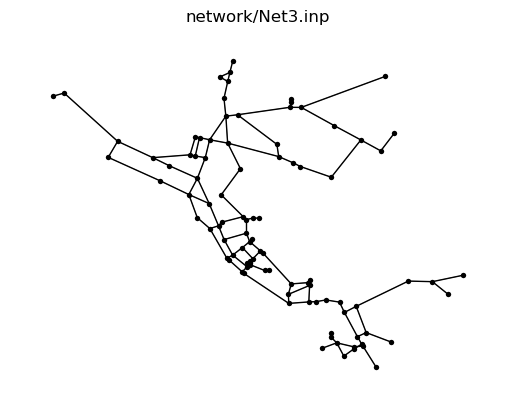

In [50]:
import wntr
import matplotlib.pyplot as plt
import numpy as np

inp_file = 'network/Net3.inp'
wn = wntr.network.WaterNetworkModel(inp_file)
# Graph the network
wntr.graphics.plot_network(wn, title=wn.name,node_size=15)
plt.show()

# View time options

In [ ]:
wn.options.time.hydraulic_timestep
wn.options.time.duration

The simulation results of nodes and pipe segments can be called using the results.node and results.link methods.<br>
results.node and results.link are dictionaries.<br>
The keys of the dictionary are the various attributes of the result.<br>
The value of the dictionary is a DataFrame.<br>
The index of that DataFrame is the time index in seconds, and columns are the name of the node<br>

# Simulate hydraulics

In [22]:
sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim()

# Call results

The simulation results of nodes and pipe segments can be called using the results.node and results.link methods.<br>
results.node and results.link are dictionaries.<br>
The keys of the dictionary are the various attributes of the result.<br>
The value of the dictionary is a DataFrame.<br>
The index of that DataFrame is the time index in seconds, and columns are the name of the node<br>

## Check the attributes

In [23]:
node_keys = results.node.keys()
link_keys = results.link.keys()
print(node_keys)
print(link_keys)

odict_keys(['head', 'demand', 'pressure', 'leak_demand'])
odict_keys(['flowrate', 'velocity', 'status', 'setting'])


## Save the datas

In [33]:
import os
directory_path = '../results_76'

# Create the directory, overwrite if it already exists
os.makedirs(directory_path, exist_ok=True)
# Save the files
for i in link_keys:
    results.link[i].to_csv('../results_76/' + i + '.csv')

for i in node_keys:
    results.node[i].to_csv('../results_76/' + i + '.csv')

## Read flowrate and heads

In [53]:
import pandas as pd

### Flow rates

In [54]:
file_path = "../results_76/flowrate.csv"
df_flow = pd.read_csv(file_path)
df_flow.head()

,Unnamed: 0,20,40,50,60,101,103,105,107,109,...,317,319,321,323,325,329,330,333,10,335
0,0,-0.141720,-0.029040,0.020770,0.830132,0.000000,0.010603,-0.026661,0.002038,-0.000658,...,0.007019,-0.000032,0.476305,-0.005008,0.009100,0.830132,0.0,0.0,0.000000,0.830132
1,3600,-0.191671,-0.062873,0.019414,0.824086,0.216727,0.116474,0.077004,0.026062,0.100171,...,0.007523,0.004533,0.488297,0.010440,0.013403,0.824086,0.0,0.0,0.216727,0.824086
2,7200,-0.228370,-0.078843,-0.008372,0.818413,0.210106,0.112424,0.080186,0.025751,0.100154,...,0.007631,0.006129,0.492513,0.015746,0.014157,0.818413,0.0,0.0,0.210106,0.818413
3,10800,-0.226241,-0.074246,-0.010389,0.815748,0.208696,0.111710,0.079729,0.025627,0.099609,...,0.007760,0.006157,0.492931,0.016103,0.014134,0.815748,0.0,0.0,0.208696,0.815748
4,14400,-0.283993,-0.100968,-0.035917,0.806909,0.198093,0.105608,0.083377,0.025560,0.099221,...,0.007718,0.004612,0.488854,0.015815,0.015187,0.806909,0.0,0.0,0.198093,0.806909


### Heads

In [55]:
file_path = "../results_76/head.csv"
df_head = pd.read_csv(file_path)
df_head.head()

,Unnamed: 0,10,15,20,35,40,50,60,601,61,...,267,269,271,273,275,1,2,3,River,Lake
0,0,44.355527,38.347227,48.158405,44.422469,44.196000,42.672000,63.706435,92.187892,92.187892,...,44.552348,44.650843,44.451816,42.915941,42.703276,44.196000,42.672000,48.158400,67.056,50.9016
1,3600,73.059311,38.640727,48.418382,45.323749,44.394309,42.262103,63.751481,92.490337,92.490337,...,46.123147,45.767286,45.359603,43.479553,43.237726,44.394308,42.262103,48.418373,67.056,50.9016
2,7200,73.569931,39.756803,48.769988,46.239091,44.823655,41.878959,63.793484,92.773662,92.773662,...,47.131654,46.730696,46.279517,44.395014,44.146682,44.823653,41.878959,48.769975,67.056,50.9016
3,10800,73.677035,40.169146,49.188910,46.627159,45.362058,42.044179,63.813132,92.906626,92.906626,...,47.517320,47.115631,46.665863,44.723347,44.467238,45.362057,42.044179,49.188897,67.056,50.9016
4,14400,74.464901,41.724318,49.603935,48.107865,45.869072,42.249215,63.877903,93.346995,93.346995,...,49.156696,48.670089,48.156256,46.377238,46.123648,45.869069,42.249215,49.603915,67.056,50.9016


# <br> Others

0         -0.450070
3600      28.253721
7200      28.764309
10800     28.871420
14400     29.659281
            ...    
590400     0.829907
594000     0.411580
597600     0.374605
601200    -0.654276
604800     0.183189
Name: 10, Length: 169, dtype: float32


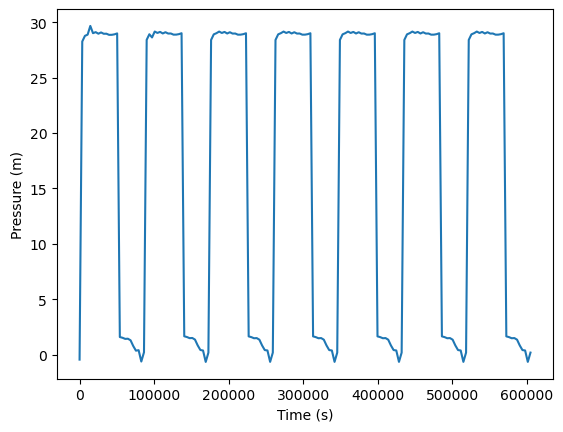

In [15]:
## Show the results

# Output a time series of pressure values for the node node 5
pressure = results.node['pressure']
pressure_at_node5 = pressure.loc[:,'10']
print(pressure_at_node5)
ax = pressure_at_node5.plot()
text = ax.set_xlabel("Time (s)")
text = ax.set_ylabel("Pressure (m)")
plt.show()

In [ ]:
>>> node_elevation = wn.query_node_attribute('elevation')
>>> junction_elevation = wn.query_node_attribute('elevation',
...     node_type=wntr.network.model.Junction)
>>> junction_elevation_10 = wn.query_node_attribute('elevation', np.greater_equal, 10, node_type=wntr.network.model.Junction)


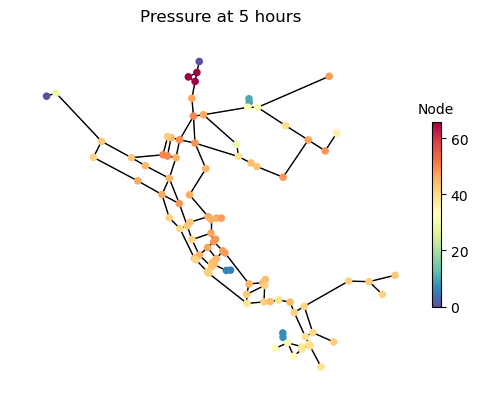

<Axes: title={'center': 'Pressure at 5 hours'}>

In [13]:
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[5*3600, :]
wr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=30, 
                        title='Pressure at 5 hours')